# 数据容器

在 Python 中，有个**数据容器**（Container）的概念。

其中包括**字符串**、由 `range()` 函数生成的**等差数列**、**列表**（List）、**元组**（Tuple）、**集合**（Set）、**字典**（Dictionary）。

这些容器，各有各的用处。其中又分为*可变*容器（Mutable）和*不可变*容器（Immutable）。可变的有列表、集合、字典；不可变的有字符串、`range()` 生成的等差数列、元组。集合，又分为 *Set* 和 *Frozen Set*；其中，Set 是*可变的*，Frozen Set 是*不可变的*。

字符串、由 `range()` 函数生成的等差数列、列表、元组是**有序类型**（Sequence Type），而集合与字典是*无序*的。

![](images/python-containers-final.png)

另外，集合没有*重合*元素。

## 迭代（Iterate）

数据容器里的元素是可以被**迭代的**（Iterable），它们其中包含的元素，可以被逐个访问，以便被处理。

对于数据容器，有一个操作符，`in`，用来判断某个元素是否属于某个容器。

由于数据容器的可迭代性，再加上这个操作符 `in`，在 Python 语言里写循环格外容易且方便（以字符串这个字符的容器作为例子）：

In [1]:
for c in 'Python':
  print(c)

P
y
t
h
o
n


In [3]:
# 20241113练习
for c in "easy":
    print(c)
"e" in "easy"

e
a
s
y


True

在 Python 出现之前，想要完成这样一个访问字符串中的每一个字符的循环，大抵上应该是这样的（比如 C 语言）：

``` C
# Written in C
char *string;

scanf("%s",string); 
int i=strlen(string);
int k = 0;
while(k<i){    
      printf("%c", string[k]);
      k++;    
  }
 ```
 
 在 Python 中，简单的 for 循环，只需要指定一个次数就可以了，因为有 range() 这个函数：

In [2]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


即便是用比 C 更为 “现代” 一点的 JavaScript，也大抵上应该是这样的：

```c
var i;
for (i = 0; i < 10; i++) { 
  console.log(i)
}
```

当然，有时候我们也需要比较复杂的计数器，不过，Python 也不只有 `for` 循环，还有 `while` 循环，在必要的时候可以写复杂的计数器。

## 列表（List）

列表和字符串一样，是个*有序类型*（Sequence Type）的容器，其中包含着有索引编号的元素。

列表中的元素可以是不同类型。不过，在解决现实问题的时候，我们总是倾向于创建由同一个类型的数据构成的列表。遇到由不同类型数据构成的列表，我们更可能做的是想办法把不同类型的数据分门别类地拆分出来，整理清楚 —— 这种工作甚至有个专门的名称与之关联：*数据清洗*。

In [32]:
#20241114练习
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import random

n=10

a_list = [random.randrange(65,91) for x in range(n)] 
b_list = [chr(random.randrange(65,91)) for x in range(n)]

a_list
b_list
del a_list[2]
a_list
list("adaf")
b_list.extend(list("A"*3))
b_list
b_list.count("A")

[85, 85, 74, 82, 80, 88, 84, 75, 82, 73]

['D', 'Z', 'X', 'R', 'R', 'B', 'J', 'T', 'O', 'D']

[85, 85, 82, 80, 88, 84, 75, 82, 73]

['a', 'd', 'a', 'f']

['D', 'Z', 'X', 'R', 'R', 'B', 'J', 'T', 'O', 'D', 'A', 'A', 'A']

3

### 列表的生成

生成一个列表，有以下几种方式：


```python
a_list = []
b_list = [1, 2, 3]
list(), or list(iterable)            # 这是 Type Casting
[(expression with x) for x in iterable]
```

In [3]:
a_list = []
a_list.append(1)
a_list.append(2)
print(a_list, f'has a length of {len(a_list)}.')

#range() 返回的不是 list，需要用 list() 转换，否则也没办法调用 .append()
b_list = list(range(1, 9))
b_list.append(11)
print(b_list, f'has a length of {len(b_list)}.')


c_list = [2**x for x in range(8)]
print(c_list, f'has a length of {len(c_list)}.')

[1, 2] has a length of 2.
[1, 2, 3, 4, 5, 6, 7, 8, 11] has a length of 9.
[1, 2, 4, 8, 16, 32, 64, 128] has a length of 8.


In [6]:
[i**2 for i in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

这最后一种方式颇为神奇：

```python
[2**x for x in range(8)]
```

这种做法，叫做 **[List Comprehension](https://docs.python.org/3.7/tutorial/datastructures.html#tut-listcomps)**。

*Comprehend* 这个词的意思除了 “理解” 之外，还有另外一个意思，就是 “包括、囊括” —— 这样的话，你就大概能理解这种做法为什么被称作 *List Comprehension* 了。中文翻译中，怎么翻译的都有，“列表生成器”、“列表生成式” 等等，都挺好。但是，被翻译成 “列表解析器”，就不太好了，给人的感觉是操作反了……

List comprehension 可以嵌套使用 `for`，甚至可以加上条件 `if`。官方文档里有个例子，是用来把两个元素并不完全相同的列表去同后拼成一个列表（下面稍作了改写）：


In [8]:
import random

n = 10 

# 生成一个 n 个元素的序列，每个元素是 1~100 之间的随机数
a_list = [random.randrange(1, 100) for i in range(n)]
print(f'a_list comprehends {len(a_list)} random numbers: {a_list}')

# 从 a_list 里把偶数都挑出来
b_list = [x for x in a_list if x % 2 == 0]
print(f'... and it has {len(b_list)} even numbers: {b_list}')

a_list comprehends 10 random numbers: [89, 71, 12, 88, 70, 94, 47, 59, 95, 22]
... and it has 5 even numbers: [12, 88, 70, 94, 22]


In [16]:
import random

n=5
a_list=[random.randrange(1,10) for i in range(n)]
a_list
b_list = [i for i in a_list if i%2==1]
b_list

[9, 1, 7]

### 列表的操作符

列表的操作符和字符串一样，因为它们都是有序容器。列表的操作符有：

> * 拼接：`+`（与字符串不一样的地方是，不能用空格 `' '` 了）
> * 复制：`*`
> * 逻辑运算：`in` 和 `not in`，`<`、`<=`、`>`、`>=`、`!=`、`==`

而后两个列表也和两个字符串一样，可以被比较，即，可以进行逻辑运算；比较方式也跟字符串一样，从两个列表各自的第一个元素开始逐个比较，“一旦决出胜负马上停止”：

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

a_list = [1, 2, 3]
b_list = [4, 5, 6]
c_list = a_list + b_list * 3
c_list
7 not in c_list
a_list > b_list

[1, 2, 3, 4, 5, 6, 4, 5, 6, 4, 5, 6]

True

False

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

a_list = [i for i in range(3)]
b_list = [i for i in range(4)]
a_list
b_list
1 in a_list
a_list > b_list

[0, 1, 2]

[0, 1, 2, 3]

True

False

### 根据索引提取列表元素

列表当然也可以根据索引操作，但由于列表是可变序列，所以，不仅可以提取，还可以删除，甚至替换。

In [13]:
import random
n = 3 
a_list = [random.randrange(65, 91) for i in range(n)]
b_list = [chr(random.randrange(65, 91)) for i in range(n)]
print(a_list)
c_list = a_list + b_list + a_list * 2
print(c_list)

print()
# 根据索引提取（Slicing）
print(c_list[3])        # 返回索引值为 3 的元素值
print(c_list[:])        # 相当于 c_list，返回整个列表
print(c_list[5:])       # 从索引为 5 的值开始直到末尾
print(c_list[:3])       # 从索引 0 开始，直到索引 3 之前（不包括 3）
print(c_list[2:6])      # 从索引 2 开始，直到索引 6 之前（不包括 6）

print()
# 根据索引删除
del c_list[3]
print(c_list)           # del 是个命令，del c_list[3] 是一个语句；不能这么写：print(del c_list[3])
del c_list[5:8]         
print(c_list)

print()
# 根据索引替换
c_list[1:5:2] = ['a', 2]  # s[start:stop:step] = t，跟 range 的三个参数类似；
                         # len(t) = len([start:stop:step]) 必须为真
print(c_list)

[75, 72, 86]
[75, 72, 86, 'J', 'Y', 'P', 75, 72, 86, 75, 72, 86]

J
[75, 72, 86, 'J', 'Y', 'P', 75, 72, 86, 75, 72, 86]
['P', 75, 72, 86, 75, 72, 86]
[75, 72, 86]
[86, 'J', 'Y', 'P']

[75, 72, 86, 'Y', 'P', 75, 72, 86, 75, 72, 86]
[75, 72, 86, 'Y', 'P', 75, 72, 86]

[75, 'a', 86, 2, 'P', 75, 72, 86]


In [39]:
a_list = [random.randrange(40,56) for i in range(4)]
a_list
b_list = [chr(random.randrange(56,78)) for i in range(3)]
b_list
c_list = a_list*3 + b_list*2
c_list

c_list[3]
c_list[1:4]
c_list[1:10:2]
c_list[:6]
c_list[6:-5]
del c_list[-5]
c_list
c_list[5:7]="str"
c_list
c_list[1:5]="123"
c_list
c_list[1:2]=[123,234]
c_list

[45, 53, 47, 43]

[';', 'I', '<']

[45, 53, 47, 43, 45, 53, 47, 43, 45, 53, 47, 43, ';', 'I', '<', ';', 'I', '<']

43

[53, 47, 43]

[53, 43, 53, 43, 53]

[45, 53, 47, 43, 45, 53]

[47, 43, 45, 53, 47, 43, ';']

[45, 53, 47, 43, 45, 53, 47, 43, 45, 53, 47, 43, ';', '<', ';', 'I', '<']

[45,
 53,
 47,
 43,
 45,
 's',
 't',
 'r',
 43,
 45,
 53,
 47,
 43,
 ';',
 '<',
 ';',
 'I',
 '<']

[45, '1', '2', '3', 's', 't', 'r', 43, 45, 53, 47, 43, ';', '<', ';', 'I', '<']

[45,
 123,
 234,
 '2',
 '3',
 's',
 't',
 'r',
 43,
 45,
 53,
 47,
 43,
 ';',
 '<',
 ';',
 'I',
 '<']

需要注意的地方是：**列表**（List）是可变序列，而**字符串**（str）是不可变序列，所以，对字符串来说，虽然也可以根据索引提取，但没办法根据索引删除或者替换。

In [7]:
s = 'Python'[2:5]
print(s)
del s[2]  # 这一句会报错

tho


TypeError: 'str' object doesn't support item deletion

之前提到过：

> 字符串常量（String Literal）是不可变有序容器，所以，虽然字符串也有一些 Methods 可用，但那些 Methods 都不改变它们自身，而是在操作后返回一个值给另外一个变量。

而对于列表这种*可变容器*，我们可以对它进行操作，结果是*它本身被改变*了。

In [8]:
s = 'Python'
L = list(s)
print(s)
print(L)
del L[2]
print(L) # 用 del 对 L 操作之后，L 本身少了 1 个元素

Python
['P', 'y', 't', 'h', 'o', 'n']
['P', 'y', 'h', 'o', 'n']


In [45]:
s ="celebrate"
l = list(s)
s
l
del l[2]
l
''.join(l)

'celebreat'

['c', 'e', 'l', 'e', 'b', 'r', 'e', 'a', 't']

['c', 'e', 'e', 'b', 'r', 'e', 'a', 't']

'ceebreat'

### 列表可用的内建函数

列表和字符串都是容器，它们可使用的内建函数也其实都是一样的：

> * `len()`
> * `max()`
> * `min()`

In [9]:
import random
n = 3 

# 生成 3 个随机数，构成一个列表
a_list = [random.randrange(65, 91) for i in range(n)]
b_list = [chr(random.randrange(65, 91)) for i in range(n)]
print(a_list)
print(b_list)

# 列表可以使用操作符 + 和*
c_list = a_list + b_list + a_list * 2
print(c_list)

a_list *= 3
print(a_list)

# 内建函数操作 len()、max()、min()
print(len(c_list))
print(max(b_list)) # 内建函数内部做了异常处理，可以在字符之间或者数字之间进行比较 —— 初学者最讨厌这种事情了……
print(min(b_list)) # 注意，max() 和 min() 应用的是 b_list, len() 应用的是 c_list —— 请自行找到对应的 list 进行分析。

print('X' not in b_list)

[89, 84, 85]
['X', 'B', 'X']
[89, 84, 85, 'X', 'B', 'X', 89, 84, 85, 89, 84, 85]
[89, 84, 85, 89, 84, 85, 89, 84, 85]
12
X
B
False


In [56]:
n= 4
a_list = [random.randrange(34,56) for i in range(n)]
a_list
b_list = [chr(random.randrange(34,57)) for i in range(n)]
b_list

c_list = a_list + b_list
max(a_list)
min(b_list)
len(c_list)
min(a)
min(b)
max(b)

[51, 36, 54, 43]

['&', '.', '*', '*']

54

'&'

8

0

'"'

'7'

### Methods

字符串常量和 range() 都是不可变的（Immutable）；而列表则是**可变类型**（Mutable type），所以，它最起码可以被排序 —— 使用 `sort()` Method：

In [76]:
import random
n = 10 
a_list = [random.randrange(1, 100) for i in range(n)]
print(f'a_list comprehends {len(a_list)} random numbers:\n', a_list)

a_list.sort()
print('the list sorted:\n', a_list)

a_list.sort(reverse=True) #reverse 参数，默认是 False
print('the list sorted reversely:\n', a_list)

a_list comprehends 10 random numbers:
 [70, 62, 16, 62, 43, 37, 30, 68, 8, 55]
the list sorted:
 [8, 16, 30, 37, 43, 55, 62, 62, 68, 70]
the list sorted reversely:
 [70, 68, 62, 62, 55, 43, 37, 30, 16, 8]


如果列表中的元素全都是由字符串构成的，当然也可以排序：

In [57]:
import random
n = 10 

a_list = [chr(random.randrange(65, 91)) for i in range(n)]
# chr() 函数会返回指定 ascii 码的字符，ord('A') 是 65
print(f'a_list comprehends {len(a_list)} random string elements:\n', a_list)

a_list.sort()
print('the list sorted:\n', a_list)

a_list.sort(reverse=True) #reverse 参数，默认是 False
print('the list sorted reversely:\n', a_list)

print()

b_list = [chr(random.randrange(65, 91)) +\
            chr(random.randrange(97, 123))\
            for i in range(n)]
# 可以在行末加上 \ 符号，表示 “该行未完待续……”

print(f'b_list comprehends {len(b_list)} random string elements:\n', b_list)

b_list.sort()
print('the sorted:\n', b_list)

b_list.sort(key=str.lower, reverse=True) 
# key 参数，默认是 None
# key=str.lower 的意思是，在比较的时候，先全都转换成小写再比较……
# —— 但并不改变原有值
print('the sorted reversely:\n', b_list)

a_list comprehends 10 random string elements:
 ['E', 'G', 'J', 'B', 'F', 'W', 'C', 'C', 'Y', 'U']
the list sorted:
 ['B', 'C', 'C', 'E', 'F', 'G', 'J', 'U', 'W', 'Y']
the list sorted reversely:
 ['Y', 'W', 'U', 'J', 'G', 'F', 'E', 'C', 'C', 'B']

b_list comprehends 10 random string elements:
 ['Ia', 'Fl', 'Oy', 'Xy', 'Ko', 'Wp', 'Xw', 'Sv', 'Sh', 'Zk']
the sorted:
 ['Fl', 'Ia', 'Ko', 'Oy', 'Sh', 'Sv', 'Wp', 'Xw', 'Xy', 'Zk']
the sorted reversely:
 ['Zk', 'Xy', 'Xw', 'Wp', 'Sv', 'Sh', 'Oy', 'Ko', 'Ia', 'Fl']


In [92]:
n =7

a_list =[random.randrange(34,45) for i in range(n)]
a_list
b_list = [chr(random.randrange(34,45)) for i in range(n)]
b_list
a_list.sort()
a_list
a_list.sort(reverse=True)
a_list

b_list.sort()
b_list
b_list.sort(reverse=True)

c_list =[chr(random.randrange(65,91)) for i in range(n)]
c_list

d_list = [chr(random.randrange(65,91)) +\
          chr(random.randrange(95,123)) \
          for i in range(n)]
d_list
d_list.sort()
d_list
d_list.sort(reverse=True)
d_list
d_list.sort(key=str.lower, reverse=True)
d_list

[41, 41, 43, 43, 41, 40, 43]

['*', '"', ')', '(', '+', '+', '*']

[40, 41, 41, 41, 43, 43, 43]

[43, 43, 43, 41, 41, 41, 40]

['"', '(', ')', '*', '*', '+', '+']

['A', 'L', 'O', 'H', 'X', 'B', 'O']

['W`', 'Tf', 'Rm', 'Cc', 'Po', 'Bn', 'Hm']

['Bn', 'Cc', 'Hm', 'Po', 'Rm', 'Tf', 'W`']

['W`', 'Tf', 'Rm', 'Po', 'Hm', 'Cc', 'Bn']

['W`', 'Tf', 'Rm', 'Po', 'Hm', 'Cc', 'Bn']

**注意**：不能乱比较…… 被比较的元素应该是同一类型 —— 所以，不是由同一种数据类型元素构成的列表，不能使用 `sort()` Method。下面的代码会报错：

In [12]:
a_list = [1, 'a', 'c']
a_list = a_list.sort() # 这一句会报错

TypeError: '<' not supported between instances of 'str' and 'int'

**可变序列**还有一系列可用的 **Methods**：`a.append()`，`a.clear()`，`a.copy()`，`a.extend(t)`，`a.insert(i，x)`，`a.pop([i])`，`a.remove(x)`，`a.reverse()`……

In [13]:
import random
n = 3 
a_list = [random.randrange(65, 91) for i in range(n)]
b_list = [chr(random.randrange(65, 91)) for i in range(n)]
print(a_list)
c_list = a_list + b_list + a_list * 2
print(c_list)

# 在末尾追加一个元素
c_list.append('100')
print(c_list)

# 清空序列
print()
print(a_list)
a_list.clear()
print(a_list)

print()
# 拷贝一个列表
d_list = c_list.copy()
print(d_list)
del d_list[6:8]
print(d_list)
print(c_list)             # 对一个拷贝操作，不会更改 “原件”

print()
# 演示拷贝 .copy() 与赋值 = 的不同
e_list = d_list
del e_list[6:8]
print(e_list)
print(d_list)             # 对 e_list 操作，相等于对 d_list 操作

# 在末尾追加一个列表
print()
print(a_list)
a_list.extend(c_list)      # 相当于 a_list += c_list
print(a_list)

# 在某索引位置插入一个元素
print()
print(a_list)
a_list.insert(1, 'example')   # 在索引 1 的位置插入 'example'
a_list.insert(3, 'example')   # 在索引 3 的位置插入 'example'；
print(a_list)

# 排序

# a_list.sort() 这一句会出错，因为当前列表中的元素，是 int 和 str 混合的。

print()
print(a_list)
a_list.reverse()
print(a_list)
x = a_list.reverse() # reverse() 只对当前序列操作，并不返回一个逆序列表；返回值是 None
print(x)

[90, 88, 73]
[90, 88, 73, 'T', 'N', 'Y', 90, 88, 73, 90, 88, 73]
[90, 88, 73, 'T', 'N', 'Y', 90, 88, 73, 90, 88, 73, '100']

[90, 88, 73]
[]

[90, 88, 73, 'T', 'N', 'Y', 90, 88, 73, 90, 88, 73, '100']
[90, 88, 73, 'T', 'N', 'Y', 73, 90, 88, 73, '100']
[90, 88, 73, 'T', 'N', 'Y', 90, 88, 73, 90, 88, 73, '100']

[90, 88, 73, 'T', 'N', 'Y', 88, 73, '100']
[90, 88, 73, 'T', 'N', 'Y', 88, 73, '100']

[]
[90, 88, 73, 'T', 'N', 'Y', 90, 88, 73, 90, 88, 73, '100']

[90, 88, 73, 'T', 'N', 'Y', 90, 88, 73, 90, 88, 73, '100']
[90, 'example', 88, 'example', 73, 'T', 'N', 'Y', 90, 88, 73, 90, 88, 73, '100']

[90, 'example', 88, 'example', 73, 'T', 'N', 'Y', 90, 88, 73, 90, 88, 73, '100']
['100', 73, 88, 90, 73, 88, 90, 'Y', 'N', 'T', 73, 'example', 88, 'example', 90]
None


有一个命令、两个 Methods 与删除单个元素相关联，`del`，`a.pop([i])`，`a.remove(x)`，请注意它们之间的区别。

In [14]:
import random
n = 3 
a_list = [random.randrange(65, 91) for i in range(n)]
print(a_list)

# 插入
print()
a_list.insert(1, 'example')   # 在索引 1 的位置插入 'example'

# 删除
print()
print(a_list)
a_list.remove('example')      # 去除 'example' 这个元素，如果有多个 'example'，只删除第一个
print(a_list)

# pop() 删除并返回被删除的值

print()
print(a_list)
p = a_list.pop(2)      # 去除索引为 2 的元素，且返回元素的值，赋值给 p
print(a_list)
print(p)

# pop() 与 del，或者 remove() 的区别
print()
a_list.insert(2, 'example')
a_list.insert(2, 'example')
print(a_list)
del a_list[2]
print(a_list)

print()
print(a_list.remove('example')) # a_list.remove() 这个 Method 的返回值是 None
print(a_list)

[88, 84, 69]


[88, 'example', 84, 69]
[88, 84, 69]

[88, 84, 69]
[88, 84]
69

[88, 84, 'example', 'example']
[88, 84, 'example']

None
[88, 84]


In [129]:
[x for x in range(1,3)]

[1, 2]

### 小结

看起来是个新概念，例子全部读完也很是要花上一段时间，然而，从操作上来看，操作列表和操作字符串的差异并不大，重点在于一个是 Immutable，另外一个是 Mutable，所以，例如像 `a.sort()`，`a.remove()` 这样的事，列表能做，字符串不能做 —— 字符串也可以排序，但那是排序之后返回给另外一个变量；而列表可以直接改变自身……

而整理成表格之后呢，理解与记忆真的是零压力：

![](images/list-concepts.png)

## 元组（Tuple）

在完整掌握列表的创建与操作之后，再理解元组（Tuple）就容易了，因为它们之间的主要区别只有两个：

> * List 是*可变*有序容器，Tuple 是*不可变*有序容器。
> * List 用*方括号*标识 `[]`，Tuple 用*圆括号* 标识 `()`。

创建一个元组的时候，用圆括号：

```python
a = ()
``` 

这样就创建了一个空元组。

多个元素之间，用 `,` 分离。

创建一个含多个元素的元组，可以省略这个括号。

In [15]:
a = 1, 2, 3   # 不建议这种写法
b = (1, 2, 3) # 在创建元组的时候建议永远不省略圆括号……
print(a)
print(b)
a == b

(1, 2, 3)
(1, 2, 3)


True

**注意**：创建单个元素的元组，无论是否使用圆括号，在那唯一的元素后面一定要*补上一个逗号* `,`：

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

a = 2, # 注意这个末尾的逗号 , 它使得 a 变量被定义为一个元组，而不是数字
a

b = 2  # 整数，赋值
b

c = (2) # 不是元组
c
type(c) # 还是 int

d = (2,) # 这才是元组
d
a == d

(2,)

2

2

int

(2,)

True

元组是不可变序列，所以，你没办法从里面删除元素。

但是，你可以在末尾追加元素。所以，严格意义上，对元组来讲，“不可变” 的意思是说，“**当前已有部分不可变**”……

In [17]:
a = 1, 
print(a)
print(id(a))
a += 3, 5
print(a)
print(id(a)) # id 并不相同 —— 实际上是在内存中另外新创建了一个元组……

(1,)
4593032496
(1, 3, 5)
4592468976


初学者总是很好奇 List 和 Tuple 的区别。首先是使用场景，在将来需要更改的时候，创建 List
；在将来不需要更改的时候，创建 Tuple。其次，从计算机的角度来看，Tuple 相对于 List 占用更小的内存。

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

n = 10000 #@param {type:"number"}
a = range(n)
b = tuple(a) # 把 a 转换成元组
c = list(a) # 把 a 转换成列表
a.__sizeof__()
b.__sizeof__()
c.__sizeof__()

48

80024

80040

等你了解了 Tuple 的标注方式，你就会发现，`range()` 函数返回的等差数列就是一个 Tuple —— `range(6)` 就相当于 `(0, 1, 2, 3, 4, 5)`。

## 集合（Set）

**集合**（Set）这个容器类型与列表不同的地方在于，首先它*不包含重合元素*，其次它是*无序*的；进而，集合又分为两种，Set，*可变的*，Frozen Set，*不可变的*。

创建一个集合，用**花括号** `{}` 把元素括起来，用 `,` 把元素隔开：

In [19]:
primes = {2, 3, 5, 7, 11, 13, 17}
primes

{2, 3, 5, 7, 11, 13, 17}

### 创建

注意：创建空集合的时候，必须用 `set()`，而不能用 `{}`:

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

a = {} # 注意这样创建的是一个 dict（字典），而不是 set 集合
b = set() # 这样创建的才是空集合
type(a)
type(b)

dict

set

也可以将序列数据转换（Casting）为集合。转换后，返回的是一个已**去重**的集合。

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

a = "abcabcdeabcdbcdef"
b = range(10)
c = [1, 2, 2, 3, 3, 1]
d = ('a', 'b', 'e', 'b', 'a')
set(a)
set(b)
set(c)
set(d)

{'a', 'b', 'c', 'd', 'e', 'f'}

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

{1, 2, 3}

{'a', 'b', 'e'}

Set 当然也可以进行 *Comprehension*：

In [22]:
a = "abcabcdeabcdbcdef"
b = {x for x in a if x not in 'abc'}
b

{'d', 'e', 'f'}

### 操作

将序列类型数据转换成 Set，就等于**去重**。当然，也可以用 `in` 来判断某个元素是否属于这个集合。`len()`、`max()`、`min()`，也都可以用来操作 Set，但 `del` 却不行 —— 因为 Set 中的元素没有索引（它不是有序容器）。从 Set 里删除元素，得用 `set.remove(elem)`；而 Frozen Set 是不可变的，所以不能用 `set.remove(elem)` 操作。

对于集合，有相应的操作符可以对它们进行集合运算：

> * 并集：`|`
> * 交集：`&`
> * 差集：`-`
> * 对称差集：`^`

之前用 `set('abcabcdeabcdbcdef')` 作为简单例子还凑合能用；但这样对读者无意义的集合，无助于进一步的理解。

事实上，每种数据结构（Data Structures —— 在这一章里，我们一直用的概念是 “容器”，其实是指同一事物的两种称呼）都有自己的应用场景。比如，当我们需要管理很多用户时，集合就可以派上很大用场。

假定两个集合中有些人是 admins，有些人是 moderators：

```python
admins = {'Moose', 'Joker', 'Joker'}
moderators = {'Ann', 'Chris', 'Jane', 'Moose', 'Zero'}
```

那么：

In [23]:
admins = {'Moose', 'Joker', 'Joker'}
moderators = {'Ann', 'Chris', 'Jane', 'Moose', 'Zero'}

admins                 # 去重自动完成
'Joker' in admins      # Joker 是否是 admins？
'Joker' in moderators  # Joker 是否是 moderator？
admins | moderators    # admins、moderator，或者身兼两职的，即，两个角色中的所有人 in admins or moderators or both
admins & moderators    # 既是 admins 又是 moderator 的都有谁？in both admins and moderators
admins - moderators    # 是 admins 但不是 moderator 的都有谁？in admins but not in moderators
admins ^ moderators    # admins 和 moderator 中不是身兼两职的都有谁？in admins or moderator but not both

{'Joker', 'Moose'}

True

False

{'Ann', 'Chris', 'Jane', 'Joker', 'Moose', 'Zero'}

{'Moose'}

{'Joker'}

{'Ann', 'Chris', 'Jane', 'Joker', 'Zero'}

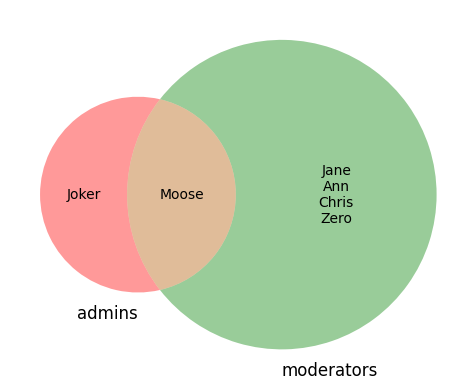

In [11]:
# 这个 cell 集合运算图示需要安装 matplotlib 和 matplotlib-venn
# !pip install matplotlib
# !pip install matplotlib-venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

admins = {'Moose', 'Joker', 'Joker'}
moderators = {'Ann', 'Chris', 'Jane', 'Moose', 'Zero'}

v = venn2(subsets=(admins, moderators), set_labels=('admins', 'moderators'))
v.get_label_by_id('11').set_text('\n'.join(admins & moderators))
v.get_label_by_id('10').set_text('\n'.join(admins - moderators))
v.get_label_by_id('01').set_text('\n'.join(moderators - admins))

plt.show()

以上的操作符，都有另外一个版本，即，用 Set 这个类的 Methods 完成。

|   意义    | 操作符 | Methods                    | Methods 相当于 |
| :------: | :----: | :---------------------: | :--: |
| 并集     | <code>&#124;</code>    | `set.union(*others)`         | <code>set &#124; other &#124; ...</code> |
| 交集     | `&`    | `set.intersection(*others)` | `set & other & ...` |
| 差集     | `-`    | `set.difference(*others)` | `set - other - ...` |
| 对称差集 | `^`    | `set.symmetric_difference(other)` | `set ^ other` |

注意，并集、交集、差集的 Methods，可以接收多个集合作为参数 `(*other)`，但对称差集 Method 只接收一个参数 `(other)`。

对于集合，推荐更多使用 Methods 而不是操作符的主要原因是：更易读 —— 对人来说，因为有意义、有用处的代码终将需要人去维护。

In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

admins = {'Moose', 'Joker', 'Joker'}
moderators = {'Chris', 'Moose', 'Jane', 'Zero'}

admins.union(moderators)
admins.intersection(moderators)
admins.difference(moderators)
admins.symmetric_difference(moderators)

{'Chris', 'Jane', 'Joker', 'Moose', 'Zero'}

{'Moose'}

{'Joker'}

{'Chris', 'Jane', 'Joker', 'Zero'}

### 逻辑运算

两个集合之间可以进行逻辑比较，返回布尔值。

**set** `==` **other**
> `True`: set 与 other 相同

**set** `!=` **other**
> `True`: set 与 other 不同

**isdisjoint**(_other_)
> `True`: set 与 other 非重合；即，`set & other == None`

**issubset**(_other_)，**set** `<=` **other**
> `True`: set 是 other 的子集

**set** `<` **other**
> `True`: set 是 other 的真子集，相当于 `set <= other && set != other`

**issuperset**(_other_)，**set** `>=` **other**
> `True`: set 是 other 的超集

**set** `>` **other**
> `True`: set 是 other 的真超集，相当于 `set >= other && set != other`

### 更新

对于集合，有以下更新它自身的 Method：

**add**(*elem*)
> 把 elem 加入集合

**remove**(*elem*)
> 从集合中删除 elem；如果集合中不包含该 elem，会产生 KeyError 错误。

**discard**(*elem*)
> 如果该元素存在于集合中，删除它。

**pop**()
> 从集合中随机删除一个元素，并返回删除的元素的值，针对空集合做此操作会产生 KeyError 错误。

**clear**()
从集合中删除所有元素。

**set.update**(*_others_)，相当于 `set |= other | ...`
> 更新 set, 加入 others 中的所有元素；

**set.intersection_update**(*_others_)，相当于 `set &= other & ...`
> 更新 set, 保留同时存在于 set 和所有 others 之中的元素；

**set.difference_update**(*_others_)，相当于 `set -= other | ...`
> 更新 set, 删除所有在 others 中存在的元素；

**set.symmetric_difference_update**(_other_)，相当于 `set ^= other`
> 更新 set, 只保留存在于 set 或 other 中的元素，但不保留同时存在于 set 和 other 中的元素；**注意**，该 Method *只接收一个参数*。

### 冻结集合

还有一种集合，叫做冻结集合（Frozen Set），Frozen Set 之于 Set，正如 Tuple 之于 List，前者是不可变容器（Immutable），后者是可变容器（Mutable），无非是为了节省内存使用而设计的类别。

有空去看看这个链接就可以了：

> https://docs.python.org/3/library/stdtypes.html#frozenset

In [20]:
a_list=list(range(2,20,3))
a_list
a_set = set(a_list)
a_set
a_frozenset = frozenset(a_set)
a_frozenset
a_frozenset.add(9)

[2, 5, 8, 11, 14, 17]

{2, 5, 8, 11, 14, 17}

frozenset({2, 5, 8, 11, 14, 17})

AttributeError: 'frozenset' object has no attribute 'add'

## 字典（Dictionary）

Map 是容器中的单独一类，**映射**（Map）容器。映射容器只有一种，叫做**字典**（Dictionary）。先看一个例子：

In [ ]:
phonebook = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225}
phonebook

字典里的每个元素，由两部分组成，_key_（键）和 _value_（值），二者由一个冒号连接。

比如，`'ann':6575` 这个字典元素，_key_ 是 `'ann'`，_value_ 是 `6575`。

字典直接使用 _key_ 作为索引，并映射到与它匹配的 _value_：

In [28]:
phonebook = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225}
phonebook['bob']

8982

在同一个字典里，_key_ 都是唯一的。当创建字典的时候，如果其中有重复的 _key_ 的话，就跟 Set 那样会 “**自动去重**” —— 保留的是众多重复的 _key_ 中的最后一个 _key:value_（或者说，最后一个 _key:value_ “之前那个 _key_ 的 _value_ 被**更新**了”）。字典这个数据类型之所以叫做 Map（映射），是因为字典里的 _key_ 都映射且只映射一个对应的 _value_。

In [29]:
phonebook = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}
phonebook

{'ann': 6585, 'bob': 8982, 'joe': 2598, 'zoe': 1225}

在已经了解如何操作列表之后，再去理解字典的操作，其实没什么难度，无非就是字典多了几个 Methods。

提蓄一下自己的耐心，把下面的若干行代码都仔细阅读一下，猜一猜输出结果都是什么？

### 字典的生成

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

aDict = {}
bDict = {'a':1, 'b':2, 'c':3}
aDict
bDict

{}

{'a': 1, 'b': 2, 'c': 3}

### 更新某个元素

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}

phonebook1['joe']
phonebook1['joe'] = 5802
phonebook1
phonebook1['joe']

2598

{'ann': 6585, 'bob': 8982, 'joe': 5802, 'zoe': 1225}

5802

In [26]:
phonebook1
phonebook1["bob"] 
phonebook1["bob"] = "fuck"
phonebook1["bob"]

{'ann': 6585, 'bob': 8982, 'joe': 5802, 'zoe': 1225}

8982

'fuck'

### 添加元素

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}
phonebook2 = {'john':9876, 'mike':5603, 'stan':6898, 'eric':7898}

phonebook1.update(phonebook2)
phonebook1

{'ann': 6585,
 'bob': 8982,
 'joe': 2598,
 'zoe': 1225,
 'john': 9876,
 'mike': 5603,
 'stan': 6898,
 'eric': 7898}

In [34]:
phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}
phonebook2 = {'joe':2344,'john':9876, 'mike':5603, 'stan':6898, 'eric':7898,'zoe':3434}
phonebook1
phonebook1.update(phonebook2)
phonebook1
%pprint

{'ann': 6585, 'bob': 8982, 'joe': 2598, 'zoe': 1225}

{'ann': 6585, 'bob': 8982, 'joe': 2344, 'zoe': 3434, 'john': 9876, 'mike': 5603, 'stan': 6898, 'eric': 7898}

Pretty printing has been turned ON


### 删除某个元素

In [35]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}

del phonebook1['ann']
phonebook1

{'bob': 8982, 'joe': 2598, 'zoe': 1225}

In [36]:
del phonebook1["bob"]
phonebook1

{'joe': 2598, 'zoe': 1225}

### 逻辑操作符

In [37]:
phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}

'ann' in phonebook1

phonebook1.keys()
'stan' in phonebook1.keys()

phonebook1.values()
1225 in phonebook1.values()

phonebook1.items()
('stan', 6898) in phonebook1.items()

True

dict_keys(['ann', 'bob', 'joe', 'zoe'])

False

dict_values([6585, 8982, 2598, 1225])

True

dict_items([('ann', 6585), ('bob', 8982), ('joe', 2598), ('zoe', 1225)])

False

In [47]:
phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}
phonebook1
phonebook1.keys()
phonebook2.values()
'bob' in phonebook1
'bob' in phonebook1.keys()
5604 in phonebook2.values()
('bob',8982) in phonebook1.values()

{'ann': 6585, 'bob': 8982, 'joe': 2598, 'zoe': 1225}

dict_keys(['ann', 'bob', 'joe', 'zoe'])

dict_values([2344, 9876, 5603, 6898, 7898, 3434])

True

True

False

False

### 可用来操作的内建函数

In [35]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}
phonebook2 = {'john':9876, 'mike':5603, 'stan':6898, 'eric':7898}
phonebook1.update(phonebook2)

len(phonebook1)
max(phonebook1)
min(phonebook1)
list(phonebook1)
tuple(phonebook1)
set(phonebook1)
sorted(phonebook1)
sorted(phonebook1, reverse=True)

8

'zoe'

'ann'

['ann', 'bob', 'joe', 'zoe', 'john', 'mike', 'stan', 'eric']

('ann', 'bob', 'joe', 'zoe', 'john', 'mike', 'stan', 'eric')

{'ann', 'bob', 'eric', 'joe', 'john', 'mike', 'stan', 'zoe'}

['ann', 'bob', 'eric', 'joe', 'john', 'mike', 'stan', 'zoe']

['zoe', 'stan', 'mike', 'john', 'joe', 'eric', 'bob', 'ann']

In [72]:

phonebook2
max(phonebook2.keys())
min(phonebook2.keys())
max(phonebook2.items())
phonebook2.update(phonebook1)
phonebook2
len(phonebook2)
sorted(phonebook2.items(),reverse=True)
set(phonebook2.items())
list(phonebook2.items())
tuple(phonebook2.items())

{'joe': 2598, 'john': 9876, 'mike': 5603, 'stan': 6898, 'eric': 7898, 'zoe': 1225, 'ann': 6585, 'bob': 8982}

'zoe'

'ann'

('zoe', 1225)

{'joe': 2598, 'john': 9876, 'mike': 5603, 'stan': 6898, 'eric': 7898, 'zoe': 1225, 'ann': 6585, 'bob': 8982}

8

[('zoe', 1225), ('stan', 6898), ('mike', 5603), ('john', 9876), ('joe', 2598), ('eric', 7898), ('bob', 8982), ('ann', 6585)]

{('eric', 7898), ('bob', 8982), ('ann', 6585), ('stan', 6898), ('mike', 5603), ('john', 9876), ('zoe', 1225), ('joe', 2598)}

[('joe', 2598), ('john', 9876), ('mike', 5603), ('stan', 6898), ('eric', 7898), ('zoe', 1225), ('ann', 6585), ('bob', 8982)]

(('joe', 2598), ('john', 9876), ('mike', 5603), ('stan', 6898), ('eric', 7898), ('zoe', 1225), ('ann', 6585), ('bob', 8982))

In [55]:
%pprint

Pretty printing has been turned OFF


### 常用 Methods

In [93]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}
phonebook2 = {'john':9876, 'mike':5603, 'stan':6898, 'eric':7898}

phonebook3 = phonebook2.copy()
phonebook3

phonebook3.clear()
phonebook3

phonebook2                      # .copy() 的 “原件” 不会发生变化

p = phonebook1.popitem()
p
phonebook1

p = phonebook1.pop('adam', 3538)
p
phonebook1

p = phonebook1.get('adam', 3538)
p
phonebook1

p = phonebook1.setdefault('adam', 3538)
p
phonebook1

{'john': 9876, 'mike': 5603, 'stan': 6898, 'eric': 7898}

{}

{'john': 9876, 'mike': 5603, 'stan': 6898, 'eric': 7898}

('zoe', 1225)

{'ann': 6585, 'bob': 8982, 'joe': 2598}

3538

{'ann': 6585, 'bob': 8982, 'joe': 2598}

3538

{'ann': 6585, 'bob': 8982, 'joe': 2598}

3538

{'ann': 6585, 'bob': 8982, 'joe': 2598, 'adam': 3538}

In [97]:
phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}
phonebook2 = {'john':9876, 'mike':5603, 'stan':6898, 'eric':7898}

phonebook3 = phonebook1.copy()
phonebook3
phonebook3.clear()
phonebook3
phonebook2.popitem()
phonebook2.pop('stan',6898)
phonebook2
phonebook2.get('mike',5603)
phonebook2
phonebook2.get('stan',2343)
phonebook2
phonebook2.pop('good',6898)
phonebook2
phonebook2.setdefault("good",6898)
phonebook2

{'ann': 6585, 'bob': 8982, 'joe': 2598, 'zoe': 1225}

{}

('eric', 7898)

6898

{'john': 9876, 'mike': 5603}

5603

{'john': 9876, 'mike': 5603}

2343

{'john': 9876, 'mike': 5603}

6898

{'john': 9876, 'mike': 5603}

6898

{'john': 9876, 'mike': 5603, 'good': 6898}

## 迭代各种容器中的元素

我们总是有这样的需求：对容器中的元素逐一进行处理（运算）。这样的时候，我们就用 `for` 循环去迭代它们。

对于迭代 `range()` 和 `list` 中的元素我们已经很习惯了：

In [37]:
for i in range(3):
    print(i)

0
1
2


In [38]:
for i in [1, 2, 3]:
    print(i)

1
2
3


### 迭代的同时获取索引

有时，我们想同时得到有序容器中的元素及其索引，那么可以调用 `enumerate()` 函数来帮我们：

In [39]:
s = 'Python'
for i, c in enumerate(s):
    print(i, c)
    

0 P
1 y
2 t
3 h
4 o
5 n


In [40]:
for i, v in enumerate(range(3)):
    print(i, v)

0 0
1 1
2 2


In [41]:
L = ['ann', 'bob', 'joe', 'john', 'mike']
for i, L in enumerate(L):
    print(i, L)

0 ann
1 bob
2 joe
3 john
4 mike


In [98]:
t = ('ann', 'bob', 'joe', 'john', 'mike')
for i, t in enumerate(t):
    print(i, t)

0 ann
1 bob
2 joe
3 john
4 mike


In [105]:
a_list = list(range(2,29,3))
a_list

for i,k in enumerate(a_list):
    print(i,k)

a_tuple = tuple(a_list)
a_tuple
for i,T in enumerate(a_tuple):
    print(i,T)

for i,R in enumerate(range(1,5)): 
    print(i, R)


[2, 5, 8, 11, 14, 17, 20, 23, 26]

0 2
1 5
2 8
3 11
4 14
5 17
6 20
7 23
8 26


(2, 5, 8, 11, 14, 17, 20, 23, 26)

0 2
1 5
2 8
3 11
4 14
5 17
6 20
7 23
8 26
0 1
1 2
2 3
3 4


### 迭代前排序

可以用 `sorted()` 和 `reversed()` 在迭代前先排好序：

In [43]:
t = ('bob', 'ann', 'john', 'mike', 'joe')
for i, t in enumerate(sorted(t)):
    print(i, t)

0 ann
1 bob
2 joe
3 john
4 mike


In [44]:
t = ('bob', 'ann', 'john', 'mike', 'joe')
for i, t in enumerate(sorted(t, reverse=True)):
    print(i, t)

0 mike
1 john
2 joe
3 bob
4 ann


In [45]:
t = ('bob', 'ann', 'john', 'mike', 'joe')
for i, t in enumerate(reversed(t)):
    print(i, t)

0 joe
1 mike
2 john
3 ann
4 bob


In [111]:
t = ('bob', 'ann', 'john', 'mike', 'joe',"zebra")
for i,T in enumerate(sorted(t)):
    print(i,T)

for i,T in enumerate(reversed(t)):
    print(i, T)

l = list(t)
l
for i,L in enumerate(sorted(l)):
    print(i,L)

for i,L in enumerate(reversed(l)):
    print(i,L)

0 ann
1 bob
2 joe
3 john
4 mike
5 zebra
0 zebra
1 joe
2 mike
3 john
4 ann
5 bob


['bob', 'ann', 'john', 'mike', 'joe', 'zebra']

0 ann
1 bob
2 joe
3 john
4 mike
5 zebra
0 zebra
1 joe
2 mike
3 john
4 ann
5 bob


### 同时迭代多个容器

可以在 `zip()` 这个函数的帮助下，同时迭代两个或者两个以上的容器中的元素（这样做的前提是，多个容器中的元素数量最好相同）：

In [46]:
chars = 'abcdefghijklmnopqrstuvwxyz'
nums = range(1, 27)
for c, n in zip(chars, nums):
    print(f"Let's assume {c} represents {n}.")

Let's assume a represents 1.
Let's assume b represents 2.
Let's assume c represents 3.
Let's assume d represents 4.
Let's assume e represents 5.
Let's assume f represents 6.
Let's assume g represents 7.
Let's assume h represents 8.
Let's assume i represents 9.
Let's assume j represents 10.
Let's assume k represents 11.
Let's assume l represents 12.
Let's assume m represents 13.
Let's assume n represents 14.
Let's assume o represents 15.
Let's assume p represents 16.
Let's assume q represents 17.
Let's assume r represents 18.
Let's assume s represents 19.
Let's assume t represents 20.
Let's assume u represents 21.
Let's assume v represents 22.
Let's assume w represents 23.
Let's assume x represents 24.
Let's assume y represents 25.
Let's assume z represents 26.


In [124]:
import random
n = 10
a_list = [random.randrange(65,91) for x in range(n)]
a_list
l = [random.randrange(65,91) for i in range(n)]
b = [chr(i) for i in l]
l
b
for i,x in zip(l,b):
    print(f"{i} of chr is {x}")

[65, 65, 65, 67, 72, 65, 67, 67, 73, 65]

[65, 84, 82, 86, 86, 81, 82, 78, 81, 70]

['A', 'T', 'R', 'V', 'V', 'Q', 'R', 'N', 'Q', 'F']

65 of chr is A
84 of chr is T
82 of chr is R
86 of chr is V
86 of chr is V
81 of chr is Q
82 of chr is R
78 of chr is N
81 of chr is Q
70 of chr is F


### 迭代字典中的元素

In [47]:
phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}

for key in phonebook1:
    print(key, phonebook1[key])

ann 6585
bob 8982
joe 2598
zoe 1225


In [48]:
phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}

for key, value in phonebook1.items():
    print(key, value)

ann 6585
bob 8982
joe 2598
zoe 1225


In [130]:
phonebook1 = {'ann':6575, 'bob':8982, 'joe':2598, 'zoe':1225, 'ann':6585}

phonebook3 = phonebook1.copy()
phonebook3

for key in phonebook3:
    print(key,phonebook3[key])

for key,value in phonebook3.items():
    print(key, value)



{'ann': 6585, 'bob': 8982, 'joe': 2598, 'zoe': 1225}

ann 6585
bob 8982
joe 2598
zoe 1225
ann 6585
bob 8982
joe 2598
zoe 1225


## 总结

这一章的内容，只不过是 “多” 而已，一旦逻辑关系理顺，就会觉得很简单。而这一章的开头，已经是最好的总结了。

最后需要补充的，只是两个参考链接，以后有什么搞不明白的地方，去那里翻翻就能找到答案：

> * https://docs.python.org/3/tutorial/datastructures.html#dictionaries
> * https://docs.python.org/3/library/stdtypes.html#typesmapping

<a href="./Part.1.E.7.files.ipynb" ><small>Next Page</small></a>